# Session 9 exercises

These are sample answers for the in-class exercises in Session 9 of PHAS0030.  You should make sure that you can do these yourself! The further work exercises will be in a separate notebook.

In [1]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors

## Section 3: Representing functions

### Question 1

In [2]:
x_samp = np.arange(0,10)
y_samp = np.exp(-x_samp)*x_samp*x_samp

### Question 2

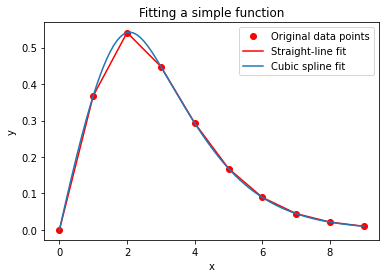

In [3]:
from scipy.interpolate import interp1d
# Create function to interpolate with cubic splines
f_int = interp1d(x_samp,y_samp,kind='cubic')
# Plot result
x_plot = np.arange(0,9.1,0.1)
plt.plot(x_samp,y_samp,'ro',label='Original data points')
plt.plot(x_samp,y_samp,'r-',label='Straight-line fit')
plt.plot(x_plot,f_int(x_plot),label='Cubic spline fit')
plt.title("Fitting a simple function")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Text(0, 0.5, 'fit - original function')

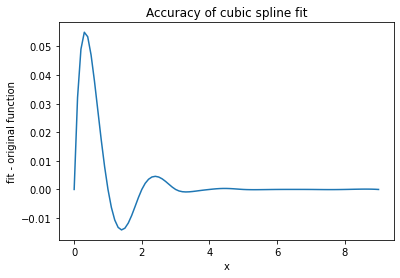

In [4]:
plt.plot(x_plot,f_int(x_plot) - np.exp(-x_plot)*x_plot*x_plot)
plt.title("Accuracy of cubic spline fit")
plt.xlabel('x')
plt.ylabel('fit - original function')
#plt.ylim(-0.02,0.55)

It's perhaps not surprising that the error is largest near the ends of the domain where the function is changing fast (this is harder to fit with splines).  Away from this point the accuracy is excellent.

### Question 3

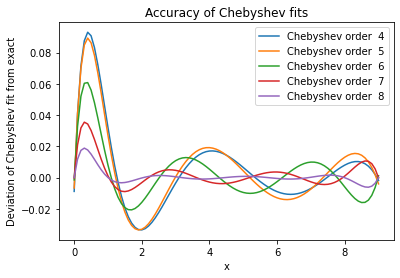

In [5]:
for order in range(4,9):
    coeff_cheb = np.polynomial.chebyshev.chebfit(x_samp,y_samp,order)
    plt.plot(x_plot,np.polynomial.chebyshev.chebval(x_plot,coeff_cheb) - 
             np.exp(-x_plot)*x_plot*x_plot,label='Chebyshev order {0:2d}'.format(order))
plt.title("Accuracy of Chebyshev fits")
plt.xlabel('x')
plt.ylabel('Deviation of Chebyshev fit from exact')
plt.legend()


We need to go to Chebyshev order 6 or above to improve on the cubic spline fit.  It's also interesting that there are larger errors here at large values of x than we saw for the splines.

## 4. Fourier transforms: basics

### Question 1

In [16]:
def discrete_ft(y):
    """Implementation of 1D discrete Fourier transform"""
    leny = len(y)
    coeffs = np.zeros(leny,dtype=complex)
    for k in range(leny):
        for i in range(leny):
            coeffs[k] += y[i]*np.exp(-2j*np.pi*k*i/leny)
    return coeffs

We can also write a more Numpy-like version and eliminate one of the loops:

In [17]:
def discrete_ft2(y):
    """Implementation of 1D discrete Fourier transform with NumPy arrays"""
    leny = len(y)
    coeffs = np.zeros(leny,dtype=complex)
    j_arr = np.arange(0,leny,1)
    for k in range(leny):
        exp_term = np.exp(-2j*np.pi*k*j_arr/leny)
        coeffs[k] += np.sum(y*exp_term)
    return coeffs

### Question 2

In [18]:
xmax = 2.0
nx = 100
dx = xmax/nx
k = 2*np.pi/xmax
x1d = np.arange(0,xmax,dx)
simple_sine = np.sin(k*x1d)#+np.random.uniform(0.0,0.1,size=nx)

Text(0, 0.5, 'sin kx')

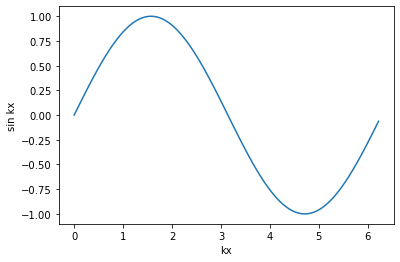

In [19]:
plt.plot(k*x1d,simple_sine)
plt.xlabel("kx")
plt.ylabel("sin kx")

(0.0, 50.0)

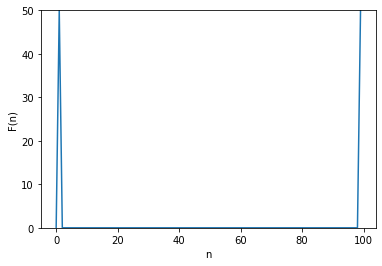

In [20]:
test_DFT = discrete_ft(simple_sine)
k1d = np.linspace(0,k*nx,nx)
plt.plot(abs(test_DFT))
plt.xlabel("n")
plt.ylabel("F(n)")
plt.ylim(0,50)

The only non-zero coefficients are for n=1 and n=-1 as we would expect (the k-axis has spacing $2\pi/L$).  Note that I've not wrapped the coefficients beyond n/2.

### Question 3

In [39]:
nx2 = 1000
dx2 = xmax/nx2
x1d2 = np.arange(0,xmax,dx2)
simple_sine2 = np.sin(k*x1d2)
test_DFT = discrete_ft(simple_sine2)

In [40]:
ss_FFT = np.fft.fft(simple_sine)

The FFT is fast enough that it's hard to tell the difference between 100 and 1,000 points.  The DFT, by contrast, takes several seconds for 1,000 points (and going beyond this can tie up your notebook for some time!).

If you use the `discrete_ft2` routine from above, you will see that it runs *much* faster: this is because we have replaced the inner loop with a numpy array function, which is faster.

### Question 4

Text(0, 0.5, 'y')

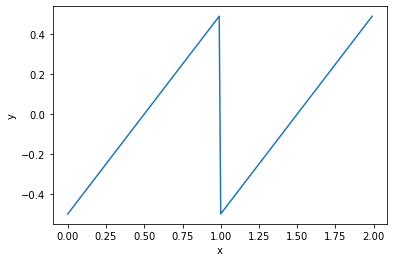

In [48]:
xsaw = np.arange(0,2,0.01)
ysaw = xsaw - 0.5
ysaw[100:] -= 1.0
plt.plot(xsaw,ysaw)
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'F[n]')

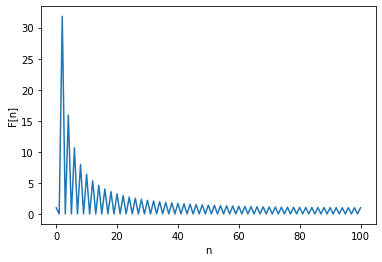

In [49]:
Fsaw = np.fft.rfft(ysaw)
plt.plot(np.abs(Fsaw))
plt.xlabel("n")
plt.ylabel("F[n]")

### Question 5

Text(0.5, 1.0, 'Approximating saw-tooth wave')

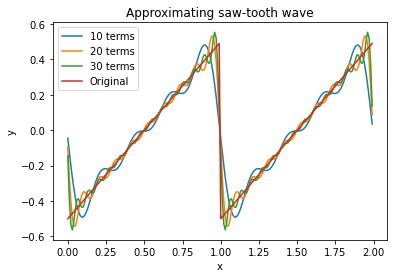

In [51]:
tmp = np.zeros_like(Fsaw)
tmp[0:10] = Fsaw[0:10]
ytrunc1 = np.fft.irfft(tmp)
tmp[0:20] = Fsaw[0:20]
ytrunc2 = np.fft.irfft(tmp)
tmp[0:30] = Fsaw[0:30]
ytrunc3 = np.fft.irfft(tmp)
plt.plot(xsaw,ytrunc1,label='10 terms')
plt.plot(xsaw,ytrunc2,label='20 terms')
plt.plot(xsaw,ytrunc3,label='30 terms')
plt.plot(xsaw,ysaw,label='Original')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Approximating saw-tooth wave")

We see that including progressively more terms improves the representation, and that the largest errors are at the points of sharp transition in the original (the Gibbs phenomenon referred to in the notes).

### Question 6

Text(0.5, 1.0, 'Noisy curve')

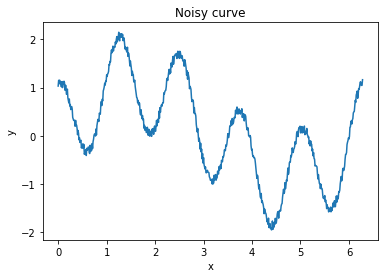

In [52]:
xnoi = np.arange(0,2*np.pi,0.01)
ynoi = np.sin(xnoi) + np.cos(5*xnoi) + 0.2*np.random.random(len(xnoi))
plt.plot(xnoi,ynoi)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Noisy curve")

Text(0.5, 1.0, 'FFT of noisy curve')

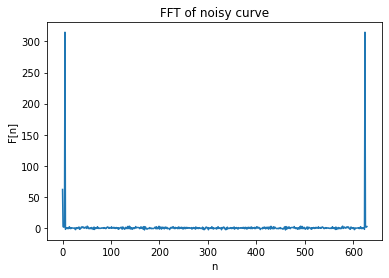

In [53]:
FFTnoi = np.fft.fft(ynoi)
plt.plot(FFTnoi.real)
plt.xlabel("n")
plt.ylabel("F[n]")
plt.title("FFT of noisy curve")

Text(0.5, 1.0, 'Cleaned curve')

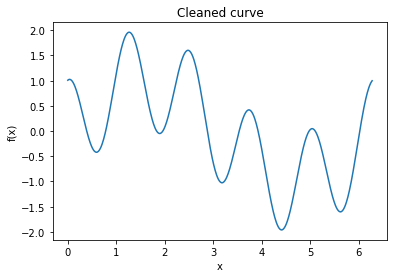

In [55]:
filtFFTnoi = np.where(abs(FFTnoi)>100,FFTnoi,0.+0j)
ynoiFilt = np.fft.ifft(filtFFTnoi)
plt.plot(xnoi,ynoiFilt.real)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Cleaned curve")

The threshold has removed the noise very effectively.

## 5. Fourier transforms: more detail

### Question 1

Text(0.5, 1.0, 'Compare analytic and FFT derivatives of sin(kx)')

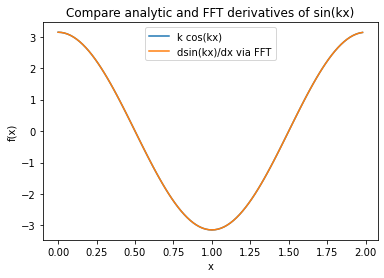

In [30]:
xmax = 2.0
nx = 100
dx = xmax/nx
k = 2*np.pi/xmax
x1d = np.arange(0,xmax,dx)
simple_sine = np.sin(k*x1d)
ss_FFT = np.fft.fft(simple_sine)

# Create array of k values
karr = np.zeros(nx)
dk = 2*np.pi/xmax
nkmax = int(nx/2-1)
karr[0:nkmax] = dk*np.arange(0,nx/2-1)
karr[nkmax+1:] = dk*np.arange(-nx/2,0)

# Use FFT from Section 4 Question 2 above
d1_ss_FFT = 1j*karr*ss_FFT

# Invert FFT to find differential
diff_simple_sine = np.fft.ifft(d1_ss_FFT)
plt.plot(x1d,k*np.cos(k*x1d),label='k cos(kx)')
plt.plot(x1d,diff_simple_sine.real,label='dsin(kx)/dx via FFT')
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Compare analytic and FFT derivatives of sin(kx)")

Text(0.5, 1.0, 'Error in FFT derivative of sin(kx)')

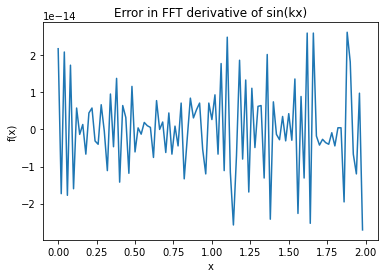

In [26]:
plt.plot(x1d,k*np.cos(k*x1d)-diff_simple_sine.real)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Error in FFT derivative of sin(kx)")

Plotting the error, we see that it is exceptionally small (near machine precision).  This is a special case: we have one frequency in the function we are differentiating, and it coincides exactly with the grid of k values.  Other cases will not be so accurate.

### Question 2

In [32]:
# Set up grid
N = 100
xymin = 0
xymax = 40
delta = (xymax-xymin)/(N-1)
print(N," points with spacing ",delta)
# Make 2D grid via meshgrid
x2 = np.linspace(xymin,xymax,N)
y2 = np.linspace(xymin,xymax,N)
a2,b2 = np.meshgrid(x2,y2,indexing='ij')
# Set up k and density
dk2d = 2*np.pi/(xymax - xymin)
dens_grid = np.sin(dk2d*a2)*np.sin(dk2d*b2)
print("Total charge: ",delta*delta*np.sum(dens_grid[0:50,0:50]))

100  points with spacing  0.40404040404040403
Total charge:  162.08668640471555


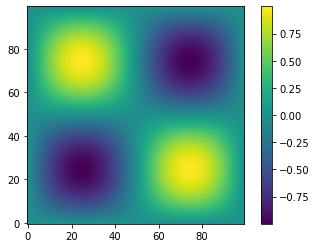

In [33]:
plt.imshow(-dens_grid,origin='lower')
plt.colorbar()

### Question 3

In [37]:
# Very simple call to N-dimensional FFT
dg_FFT = np.fft.fftn(dens_grid)
# Set up k-grid
nk2dmax = int(N/2-1)
k2darr = np.zeros(N)
k2darr[0:nk2dmax+1] = dk2d*np.arange(0,N/2)
k2darr[nk2dmax+1:] = dk2d*np.arange(-N/2,0)
k2d_x, k2d_y = np.meshgrid(k2darr,k2darr)
# Create solution to Poisson equation
d2_dg_FFT = dg_FFT/(k2d_x*k2d_x + k2d_y*k2d_y+1e-16)
d2_dg_FFT[0,0] = 0.0
# Invert to solve for potential
pot = np.fft.ifftn(d2_dg_FFT)

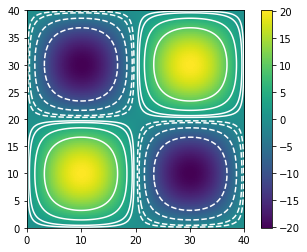

In [20]:
plt.imshow(pot.real,extent=(xymin,xymax,xymin,xymax),origin='lower')
plt.colorbar()
contours = [-10,-5,-2,-1,1.0,2.0,5.0,10]
plt.contour(a2,b2,pot.real,contours,colors='w')

### Question 4

This is what we find for the exact potential using a non-repeated grid.  Notice how the edges are rather different, and the overall shape is not the same.  Also the maximum values of potential at the centre of the cells zer slightly larger.

In [21]:
pot_exact2 = np.zeros((N,N))
# Loop over x and y in r
for i, x in enumerate(x2):
    for j, y in enumerate(y2):
        
        # These lines create |r-r'| for all r' (a2,b2)
        xw = a2 - x
        yw = b2 - y
        
        # Denominator including special treatment for r=r'
        denom = np.sqrt(xw**2 + yw**2)
        denom[i,j] = 1.0
        pothere = dens_grid/denom
        
        # Care when r=r'
        pothere[i,j] = 0.0
        
        # Find potential by summing over r' and scaling by area element
        pot_exact2[i,j] = np.sum(pothere)*delta*delta

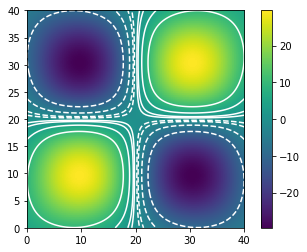

In [22]:
plt.imshow(pot_exact2,extent=(xymin,xymax,xymin,xymax),origin='lower')
plt.colorbar()
contours = [-10,-5,-2,-1,1.0,2.0,5.0,10]
plt.contour(a2,b2,pot_exact2,contours,colors='w')

### Question 5
Now we use a charge density on a larger grid (use the same functional form) to solve exactly but only consider the central part of the potential.  This should match the FFT solution more closely.

In [23]:
N4 = 200
xymin4 = 0
xymax4 = 80
delta4 = (xymax4-xymin4)/(N4-1)
x4 = np.linspace(xymin4,xymax4,N4)
y4 = np.linspace(xymin4,xymax4,N4)
a4,b4 = np.meshgrid(x4,y4,indexing='ij')
pot_exact4 = np.zeros((N4,N4))
dens_grid4 = np.sin(dk2d*a4+np.pi)*np.sin(dk2d*b4+np.pi)
for i, x in enumerate(x4):
    for j, y in enumerate(y4):
        xw = a4 - x
        yw = b4 - y
        denom = np.sqrt(xw**2 + yw**2)
        denom[i,j] = 1.0
        pothere = dens_grid4/denom
        pothere[i,j] = 0.0
        pot_exact4[i,j] = np.sum(pothere)*delta4*delta4

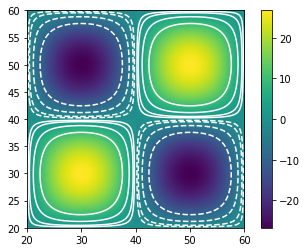

In [24]:
plt.imshow(pot_exact4[50:150,50:150],extent=(20,60,20,60),origin='lower')
plt.colorbar()
plt.contour(a4[50:150,50:150],b4[50:150,50:150],pot_exact4[50:150,50:150],contours,colors='w')

We see that the shapes now match the FFT (periodic) solution much more closely.

### Question 6
We use FFT methods on a large charge density with zero padding to mimic the exact solution for question 4

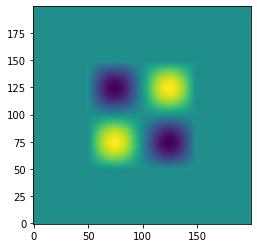

In [30]:
dens_grid5 = np.copy(dens_grid4)
dens_grid5[0:49,:] = 0.0
dens_grid5[150:] = 0.0
dens_grid5[:,0:49] = 0.0
dens_grid5[:,150:] = 0.0
plt.imshow(dens_grid5,origin='lower')

In [26]:
dg_FFT5 = np.fft.fftn(dens_grid5)
dk2d5 = 2*np.pi/(xymax4 - xymin4)
nk2dmax5 = int(N4/2-1)
k2darr5 = np.zeros(N4)
k2darr5[0:nk2dmax5+1] = dk2d5*np.arange(0,N4/2)
k2darr5[nk2dmax5+1:] = dk2d5*np.arange(-N4/2,0)
k2d_x5, k2d_y5 = np.meshgrid(k2darr5,k2darr5)
d2_dg_FFT5 = dg_FFT5/(k2d_x5*k2d_x5 + k2d_y5*k2d_y5+1e-16)
d2_dg_FFT5[0,0] = 0.0
pot5 = np.fft.ifftn(d2_dg_FFT5)

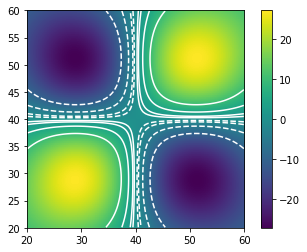

In [27]:
plt.imshow(pot5.real[50:150,50:150],extent=(20,60,20,60),origin='lower')
plt.colorbar()
plt.contour(a4[50:150,50:150],b4[50:150,50:150],pot5.real[50:150,50:150],contours,colors='w')

This is somewhat similar to Q4 but not completely; going to a larger density should converge to the same result.  I plotted the potential on the full grid below, for reference.

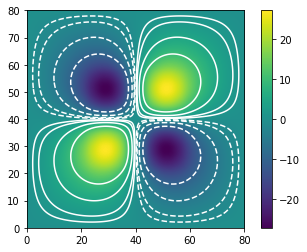

In [29]:
plt.imshow(pot5.real,extent=(0,80,0,80),origin='lower')
plt.colorbar()
plt.contour(a4,b4,pot5.real,contours,colors='w')